![Logo de AA1](logo_AA1_texto_small.png) 
# Sesión 14 - Subajuste, sobreajuste y ruido

En esta sesión de prácticas vamos a analizar dos situaciones típicas a las que nos tendremos que enfrentar en multitud de ocasiones: el sobreajuste y el subajuste. También hablaremos brevemente de cómo nos afecta el ruido en los datos.

Para mostrar estas situaciones y ver cómo enfrentarnos a ellas, vamos a utilizar un conjunto de datos que hemos creado a tal efecto:


#####################################################
#### Cargamos el problema no lineal
#####################################################


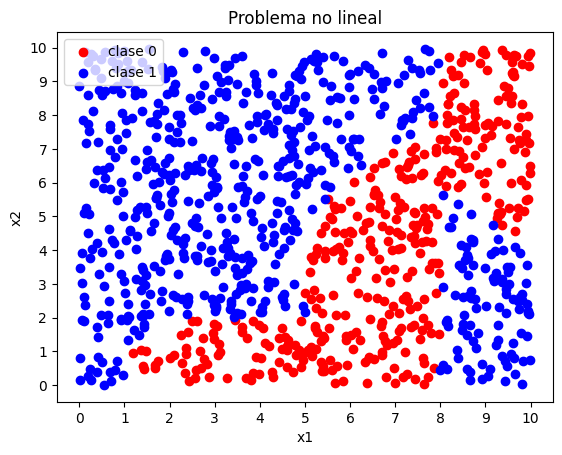

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

def pinta(X_clase0, X_clase1, texto):
    fig, ax = plt.subplots()
    ax.scatter(X_clase0[:, 0], X_clase0[:, 1], c='r', label='clase 0')
    ax.scatter(X_clase1[:, 0], X_clase1[:, 1], c='b', label='clase 1')
    ax.set_title(texto)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.legend(loc="upper left")
    # ax.grid(True)
    ax.set_xticks(list(range(0,11)))
    ax.set_yticks(list(range(0,11)))
    plt.show()

print("\n#####################################################")
print("#### Cargamos el problema no lineal")
print("#####################################################")

df = pd.read_excel('ejemplo.xlsx', sheet_name='datos')
filas, columnas = df.shape

# separamos las primeras columnas y las almacenamos en X
X = df.iloc[:,0:(columnas-1)]

# separamos la clase
y = df.iloc[:,(columnas-1)]

pinta(X[y==0].values, X[y==1].values, 'Problema no lineal')

Como se puede apreciar, se trata de un problema que tiene solo dos atributos y que no es lineal, es decir, no se pueden separar los ejemplos de ambas clases utilizando una recta o un hiperplano.

## 14.1 Subajuste o underfitting

Si quisiésemos crear un modelo y entrenarlo con este conjunto de datos, podríamos utilizar alguno de los algoritmos que hemos visto hasta el momento (K-vecinos, árboles de decisión o regresión logística) u otros existentes que todavía no hemos visto (por ejemplo las máquinas de vectores soporte o las redes neuronales).

Vamos a utilizar en este caso el algoritmo visto en la sesión anterior, la regresión logística, y además, vamos a hacer una reescritura, es decir, vamos a evaluar el modelo utilizando también el conjunto de entrenamiento, con lo que el modelo tiene cierta ventaja, ya que se le evaluará con los mismos datos con los que ha entrenado.

In [3]:
# creamos una instancia de regresión logística
sys_lr = LogisticRegression()

# entrenamos
sys_lr.fit(X, y)

# evaluamos sobre el mismo conjunto
y_pred = sys_lr.predict(X)

print("Accuracy en reescritura: %.4f" % metrics.accuracy_score(y, y_pred))

Accuracy en reescritura: 0.7650


Vemos que la accuracy que obtenemos está muy lejos de ser la máxima posible. Aunque le hayamos dado ventaja al sistema permitiéndole medir su rendimiento utilizando el mismo conjunto que ha utilizado para entrenar, vemos que la regresión logística no es capaz de ofrecer un buen rendimiento.

¿A qué se debe esto?

En la sesión anterior vimos que la regresión logística aprendía los parámetros de un hiperplano que utilizaba para separar los ejemplos de ambas clases. ¿Serías capaz de dibujar una recta que separe los ejemplos de ambas clases? Seguro que no, y la regresión logística tampoco puede.

Estamos ante una situación de subajuste o underfitting. El algoritmo que pretendemos utilizar para resolver el problema tiene unas limitaciones que le hacen imposible resolver la tarea con un buen rendimiento.

### 14.1.1 Soluciones para el subajuste

La solución es evidente: si el bajo rendimiento del modelo se debe a limitaciones del algoritmo, lo mejor es cambiar de algoritmo.

Vamos a ver qué pasa si utilizamos K-vecinos y árboles de decisión:

In [4]:
# probamos con K-vecinos
sys_knn = KNeighborsClassifier(n_neighbors=1)
sys_knn.fit(X, y)
y_pred = sys_knn.predict(X)
print("\nK-vecinos     -     Accuracy en reescritura: %.4f" % metrics.accuracy_score(y, y_pred))

# probamos con un árbol de decisión
sys_tree = DecisionTreeClassifier(random_state=1234)
sys_tree.fit(X, y)
y_pred = sys_tree.predict(X)
print("Árbol de decisión - Accuracy en reescritura: %.4f" % metrics.accuracy_score(y, y_pred))


K-vecinos     -     Accuracy en reescritura: 1.0000
Árbol de decisión - Accuracy en reescritura: 1.0000


En ambos casos obtenemos la accuracy más alta posible. 

Los dos algoritmos son capaces de adaptarse perfectamente a los datos del conjunto de entrenamiento y esto es así porque no tienen las limitaciones que sí tiene la regresión logística y, por tanto, tienen facilidad para adaptarse a conjuntos de datos no lineales.

En vista de esto podríamos pensar que no merece la pena utilizar nunca la regresión logística, sin embargo, esto no es así. Frecuentemente nos enfrentaremos a problemas que de carácter lineal donde la regresión logística ofrecerá resultados mejores que los ofrecidos por otros sistemas.

## 14.2 Sobreajuste u overfitting

El conjunto de datos que vimos antes representa una situación ideal en la que tenemos un espacio bien acotado (todo sucede entre 0 y 10), disponemos de muchos ejemplos dispuestos sobre ese espacio y estos ejemplos delimitan de manera clara las fronteras entre ambas clases.

La realidad no es tan sencilla. Normalmente no dispondremos de todos esos ejemplos que nos van a permitir definir las fronteras entre ambas clases. Si nos pidiesen entrenar un modelo para poder distinguir entre gatos y tigres a partir de fotografías, no podemos pretender tener las fotos de todos los gatos y todos los tigres que hay sobre la faz de la tierra, seguramente deberemos entrenar nuestro modelo con un número de fotografías mucho más reducido.

Vamos a simular esa situación y para ello vamos a hace un hold-out en el que utilizaremos un 10% de los ejemplos para entrenar y un 90% para evaluar:

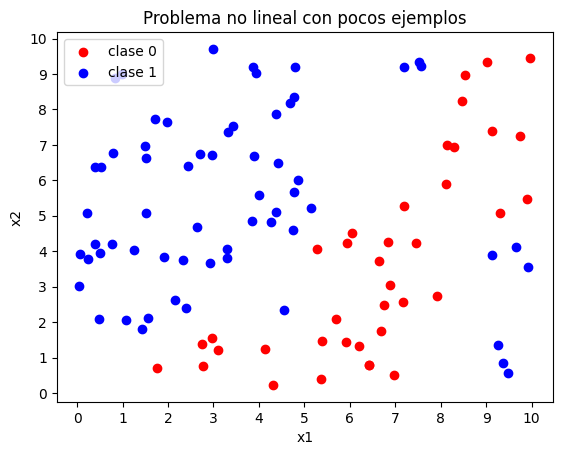

In [5]:
# Hold-out 10-90 estratificado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=1234, stratify=y)

pinta(X_train[y_train==0].values, X_train[y_train==1].values, 'Problema no lineal con pocos ejemplos')

Se puede observar que, al utilizar solo el 10% de los ejemplos para entrenar, las fronteras ya no están tan bien definidas en el conjunto de entrenamiento. 

Vamos a entrenar los modelos con este conjunto de entrenamiento y a evaluar su rendimiento tanto en el conjunto de entrenamiento como en el conjunto de test:

In [7]:
# probamos con regresión logística
sys_lr = LogisticRegression()
sys_lr.fit(X_train, y_train)
y_pred = sys_lr.predict(X_train)
print("Regresión Logística - Accuracy en train: %.4f" % metrics.accuracy_score(y_train, y_pred))
y_pred = sys_lr.predict(X_test)
print("Regresión Logística - Accuracy en test : %.4f" % metrics.accuracy_score(y_test, y_pred))

# probamos con K-vecinos
sys_knn = KNeighborsClassifier(n_neighbors=1)
sys_knn.fit(X_train, y_train)
y_pred = sys_knn.predict(X_train)
print("K-vecinos - Accuracy en train: %.4f" % metrics.accuracy_score(y_train, y_pred))
y_pred = sys_knn.predict(X_test)
print("K-vecinos - Accuracy en test : %.4f" % metrics.accuracy_score(y_test, y_pred))

# probamos con un árbol de decisión
sys_tree = DecisionTreeClassifier(random_state=1234)
sys_tree.fit(X_train, y_train)
y_pred = sys_tree.predict(X_train)
print("Árbol de decisión - Accuracy en train: %.4f" % metrics.accuracy_score(y_train, y_pred))
y_pred = sys_tree.predict(X_test)
print("Árbol de decisión - Accuracy en test : %.4f" % metrics.accuracy_score(y_test, y_pred))

Regresión Logística - Accuracy en train: 0.8400
Regresión Logística - Accuracy en test : 0.7978
K-vecinos - Accuracy en train: 1.0000
K-vecinos - Accuracy en test : 0.9256
Árbol de decisión - Accuracy en train: 1.0000
Árbol de decisión - Accuracy en test : 0.8300


La regresión logística obtiene una accuracy no muy diferente entre el conjunto de entrenamiento y el de test. Ya habíamos visto que la regresión logística tiene dificultades para adaptarse a este problema, así que sus resultados no se diferencian mucho entre sí.

Lo que nos puede llamar un poco más la atención es lo que sucede con el K-vecinos y el árbol de decisión. Estos algoritmos son capaces de adaptarse mucho más a los datos de entrenamiento y eso es lo que hacen, por eso obtienen una accuracy muy alta en el conjunto de entrenamiento. Sin embargo, su accuracy en el conjunto de test baja considerablemente. Esta situación es conocida como **sobreajuste u overfitting**.

El sobreajuste es un efecto que consiste en que un modelo se ha ajustado demasiado a los ejemplos del conjunto de entrenamiento y eso no le permite generalizar bien para casos no vistos.

### 14.2.1 Soluciones al sobreajuste

¿Cómo podemos evitar el sobreajuste?

1. La mejor solución es aumentar en número de ejemplos de entrenamiento disponibles. Si conseguimos tener un conjunto de entrenamiento que tenga bien definidas las fronteras entre las clases, que contenga ejemplos por todo el espacio del problema y que no presente ruido, entonces cuanto más nos ajustemos a los datos de entrenamiento mejor será el modelo y no habrá riesgo de sobreajuste.

2. Como casi nunca se puede disponer de un conjunto de ejemplos tan bueno, lo que se suele hacer es aplicar **regularización**. La regularización consiste en limitar la capacidad que tiene un algoritmo para adaptarse a los ejemplos del conjunto de entrenamiento. 

A cada algoritmo se le aplica regularización de manera diferente:
- A la regresión logística se le limitan los valores que pueden tomar los parámetros que trata de aprender mediante la norma l1 o l2. Valores altos del hiperparámetro `C` permiten ajustarse más a los datos, mientras que valores bajos (entre 0 y 1) hacen que la regularización no permita ajustarse demasiado.
- En el K-vecinos, utilizar `n_neighbors=1` hace que el algoritmo se ajuste mucho al conjunto de datos mientras que utilizar valores mayores implica un menor ajuste.
- En los árboles de decisión, permitir que un árbol crezca hasta clasificar correctamente todos los ejemplos de entrenamiento puede llevarnos a sobreajuste, así que la manera de regularizar será no permitirle crecer todo lo que quiera (a esto se le llama comunmente *podar el árbol*). En la sesión en la que practicamos con árboles de decisión vimos varios hiperparámetros que nos permiten limitar el crecimiento de los árboles. El más simple de todos ellos es `max_depth`, que limita la profundidad de todas las ramas de un árbol.

Veamos algún ejemplo:

In [8]:
# probamos con regresión logística
sys_lr = LogisticRegression(C=0.1)
sys_lr.fit(X_train, y_train)
y_pred = sys_lr.predict(X_train)
print("Regresión Logística - Accuracy en train: %.4f" % metrics.accuracy_score(y_train, y_pred))
y_pred = sys_lr.predict(X_test)
print("Regresión Logística - Accuracy en test : %.4f" % metrics.accuracy_score(y_test, y_pred))

Regresión Logística - Accuracy en train: 0.8400
Regresión Logística - Accuracy en test : 0.7900


En el caso de la regresión logística ya estábamos aplicando regularización. Variando el valor de `C` podremos añadir más o menos regularización, sin embargo, en este conjunto de datos no observaremos mejoraría ya que, como vimos al principio de la sesión, la regresión logística no puede resolver esta tarea.

In [9]:
# probamos con K-vecinos
sys_knn = KNeighborsClassifier(n_neighbors=3)
sys_knn.fit(X_train, y_train)
y_pred = sys_knn.predict(X_train)
print("K-vecinos - Accuracy en train: %.4f" % metrics.accuracy_score(y_train, y_pred))
y_pred = sys_knn.predict(X_test)
print("K-vecinos - Accuracy en test: %.4f" % metrics.accuracy_score(y_test, y_pred))

K-vecinos - Accuracy en train: 0.9900
K-vecinos - Accuracy en test: 0.9389


En el caso del K-vecinos podéis observar cómo al ir aumentando el número de vecinos la accuracy en train va disminuyendo mientras que la accuracy en test puede aumentar. Si aumentamos demasiado la regularización entonces el modelo pierde rendimiento tanto en entrenamiento como en test.

In [10]:
# probamos con un árbol de decisión
sys_tree = DecisionTreeClassifier(random_state=1234, max_depth=3)
sys_tree.fit(X_train, y_train)
y_pred = sys_tree.predict(X_train)
print("Árbol de decisión - Accuracy en train: %.4f" % metrics.accuracy_score(y_train, y_pred))
y_pred = sys_tree.predict(X_test)
print("Árbol de decisión - Accuracy en test: %.4f" % metrics.accuracy_score(y_test, y_pred))

Árbol de decisión - Accuracy en train: 0.9900
Árbol de decisión - Accuracy en test: 0.8356


Algo parecido sucede con los árboles de decisión, si vamos limitando la profundidad (aumentando la regularización) la accuracy en train se va reduciendo y puede que se mejore algo en test. Si nos pasamos con la regularización entonces empeoraremos en todos los sentidos. 

En este caso, hay mucha diferencia entre la accuracy obtenida en train y en test, con lo que el árbol sigue sobreajustado. Tal vez deberíamos explorar otros hiperparámetros que nos permitan mayor flexibilidad en función de las ramas del árbol.

## 14.3 Ruido

El conjunto de datos con el que hemos estado trabajando tiene anotados todos los datos de manera correcta. Sin embargo, esto no es lo habitual y solemos encontrarnos con ejemplos que contienen alguna imperfección, ya sea en los valores de sus atributos o de la clase.

Puede suceder que uno de los atributos se corresponda con valores tomados por un sensor que a veces funciona mal, puede ser que una persona anote la clase de los ejemplos y en un momento de despiste los anote mal,...

Vamos a incorporar un poco de ruido a nuestro conjunto de datos:

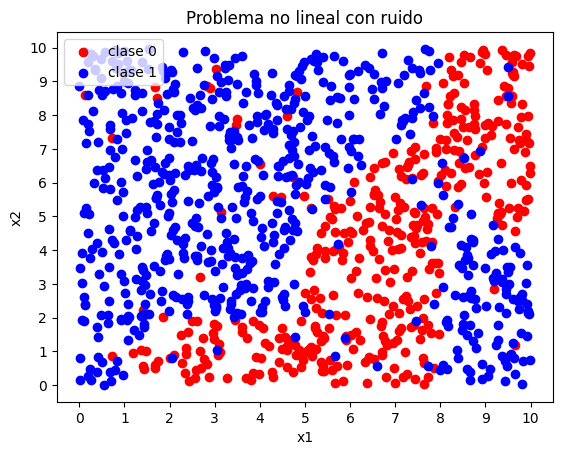

In [11]:
# cargamos los datos ruidosos que están en la pestaña 'ruido'
df_ruido = pd.read_excel('ejemplo.xlsx', sheet_name='ruido')

# los concatenamos con los datos que ya teníamos
df = pd.concat([df, df_ruido], axis=0, ignore_index=True)
filas, columnas = df.shape

# separamos las primeras columnas y las almacenamos en X
X = df.iloc[:,0:(columnas-1)]

# separamos la clase
y = df.iloc[:,(columnas-1)]

pinta(X[y==0].values, X[y==1].values, 'Problema no lineal con ruido')

Como vemos, las fronteras entre las clases yo no están tan claras aunque pueden intuirse.

Si utilizamos un 80% de estos ejemplos para entrenar, contaremos con estos ejemplos durante el entrenamiento:

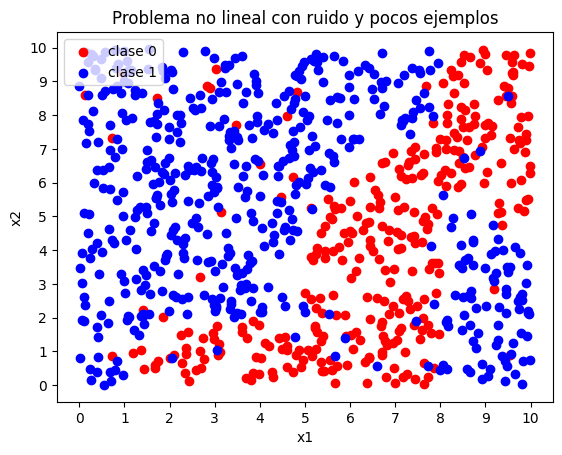

In [12]:
# Hold-out 80-20 estratificado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)

pinta(X_train[y_train==0].values, X_train[y_train==1].values, 'Problema no lineal con ruido y pocos ejemplos')

Se intuyen las fronteras, pero vemos que los ejemplos ruidosos se entremezclan con los no ruidosos pudiendo confundirnos.

Veamos el rendimiendo de los modelos que se entrenan en estas circunstancias:

In [13]:
# probamos con regresión logística
sys_lr = LogisticRegression(C=1)
sys_lr.fit(X_train, y_train)
y_pred = sys_lr.predict(X_train)
print("Regresión Logística - Accuracy en train: %.4f" % metrics.accuracy_score(y_train, y_pred))
y_pred = sys_lr.predict(X_test)
print("Regresión Logística - Accuracy en test : %.4f" % metrics.accuracy_score(y_test, y_pred))

# probamos con K-vecinos
sys_knn = KNeighborsClassifier(n_neighbors=1)
sys_knn.fit(X_train, y_train)
y_pred = sys_knn.predict(X_train)
print("K-vecinos - Accuracy en train: %.4f" % metrics.accuracy_score(y_train, y_pred))
y_pred = sys_knn.predict(X_test)
print("K-vecinos - Accuracy en test : %.4f" % metrics.accuracy_score(y_test, y_pred))

# probamos con un árbol de decisión
sys_tree = DecisionTreeClassifier(random_state=1234)
sys_tree.fit(X_train, y_train)
y_pred = sys_tree.predict(X_train)
print("Árbol de decisión - Accuracy en train: %.4f" % metrics.accuracy_score(y_train, y_pred))
y_pred = sys_tree.predict(X_test)
print("Árbol de decisión - Accuracy en test : %.4f" % metrics.accuracy_score(y_test, y_pred))

Regresión Logística - Accuracy en train: 0.7417
Regresión Logística - Accuracy en test : 0.7238
K-vecinos - Accuracy en train: 1.0000
K-vecinos - Accuracy en test : 0.8524
Árbol de decisión - Accuracy en train: 1.0000
Árbol de decisión - Accuracy en test : 0.8762


La tarea se ha complicado bastante.

La regresión logística vemos que tiene serias dificultades ya que, por su carácter lineal, es imposible que resuelva este problema no lineal.

Los otros dos algoritmos tiene un rendimiento perfecto en train pero mucho peor en test, con lo que se puede apreciar que se están sobreajustando.

Además, es importante darse cuenta de que al haber introducido ejemplos con ruido, lo deseable sería que nuestro modelo les asignase a esos ejemplos la clase que verdaderamente les corresponde y eso penalizaría en la accuracy.

Probemos a regularizar un poco su entrenamiento:

In [14]:
# probamos con regresión logística
sys_lr = LogisticRegression(C=0.1)
sys_lr.fit(X_train, y_train)
y_pred = sys_lr.predict(X_train)
print("Regresión Logística - Accuracy en train: %.4f" % metrics.accuracy_score(y_train, y_pred))
y_pred = sys_lr.predict(X_test)
print("Regresión Logística - Accuracy en test : %.4f" % metrics.accuracy_score(y_test, y_pred))

# probamos con K-vecinos
sys_knn = KNeighborsClassifier(n_neighbors=7)
sys_knn.fit(X_train, y_train)
y_pred = sys_knn.predict(X_train)
print("K-vecinos - Accuracy en train: %.4f" % metrics.accuracy_score(y_train, y_pred))
y_pred = sys_knn.predict(X_test)
print("K-vecinos - Accuracy en test : %.4f" % metrics.accuracy_score(y_test, y_pred))

# probamos con un árbol de decisión
sys_tree = DecisionTreeClassifier(random_state=1234, max_depth=4)
sys_tree.fit(X_train, y_train)
y_pred = sys_tree.predict(X_train)
print("Árbol de decisión - Accuracy en train: %.4f" % metrics.accuracy_score(y_train, y_pred))
y_pred = sys_tree.predict(X_test)
print("Árbol de decisión - Accuracy en test : %.4f" % metrics.accuracy_score(y_test, y_pred))

Regresión Logística - Accuracy en train: 0.7393
Regresión Logística - Accuracy en test : 0.7238
K-vecinos - Accuracy en train: 0.9524
K-vecinos - Accuracy en test : 0.9000
Árbol de decisión - Accuracy en train: 0.9310
Árbol de decisión - Accuracy en test : 0.9000


Vemos que limitando un poco su capacidad de adaptación (se reduce la accuracy en train) podemos conseguir mejorar su rendimiento ante casos no vistos durante el entrenamiento.


## Ejercicios

1. Carga el mismo conjunto de ejemplos que hemos utilizado en esta práctica añadiendo los ejemplos ruidosos. 
2. Separar el conjunto en 50% para entrenar y 50% para test (estratificado).
3. Utiliza K-vecinos y un árbol de decisión para aprender y evaluar el rendimiento. Visualiza el árbol de decisión.
4. Haz una búsqueda de hiperparámetros (`GridSearchCV()`) utilizando los ejemplos del conjunto de entrenamiento. 
5. Evalúa el rendimiento de los sistemas y visualiza el nuevo árbol generado.

Estos ejercicios no es necesario entregarlos.